In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargar los datos
df = pd.read_csv('ventas_pedidos_delipay.csv', encoding='latin1')

In [3]:
# Mostrar el DataFrame
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
print(df)


     PedidoID           Cliente    Producto  Cantidad FechaPedido  FechaEnvio      Estado      Comentarios          Recomendación  ClasificaciónComentario
0           1        Juan Pérez  Producto A         2  2023-05-01  2023-05-03     Enviado   Entrega rápida  Altamente recomendado                      1.0
1           2      Ana Martínez  Producto B         1  2023-05-02  2023-05-04   Entregado    Buen embalaje            Recomendado                      1.0
2           3      Carlos Gómez  Producto A         3  2023-05-03  2023-05-05  En proceso              NaN                    NaN                      NaN
3           4   Lucía Fernández  Producto C         5  2023-05-04         NaN   Pendiente              NaN                    NaN                      NaN
4           5        Pablo Ruiz  Producto B         2  2023-05-05  2023-05-07   Entregado  Servicio rápido  Altamente recomendado                      1.0
..        ...               ...         ...       ...         ...     

In [4]:
# Convertir las fechas a formato datetime
df['FechaPedido'] = pd.to_datetime(df['FechaPedido'])
df['FechaEnvio'] = pd.to_datetime(df['FechaEnvio'])

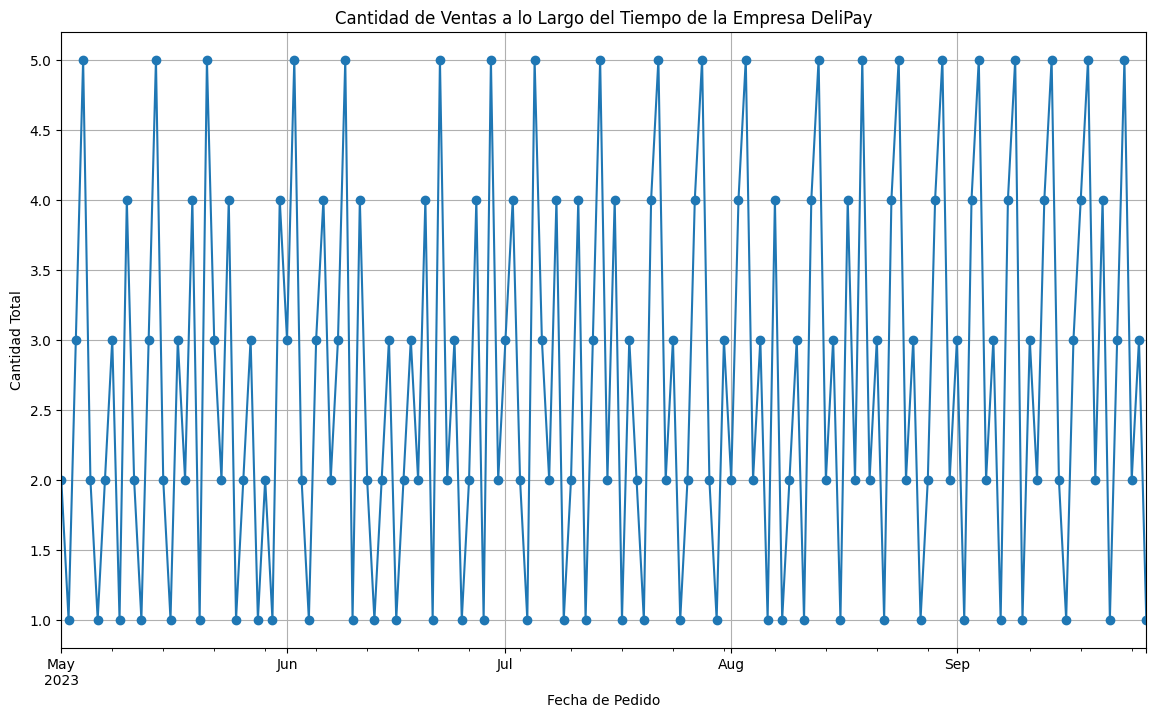

In [5]:
# Tendencia de ventas a lo largo del tiempo
plt.figure(figsize=(14,8))
df.groupby('FechaPedido')['Cantidad'].sum().plot(marker='o')
plt.title('Cantidad de Ventas a lo Largo del Tiempo de la Empresa DeliPay')
plt.xlabel('Fecha de Pedido')
plt.ylabel('Cantidad Total')
plt.grid(True)
plt.show()


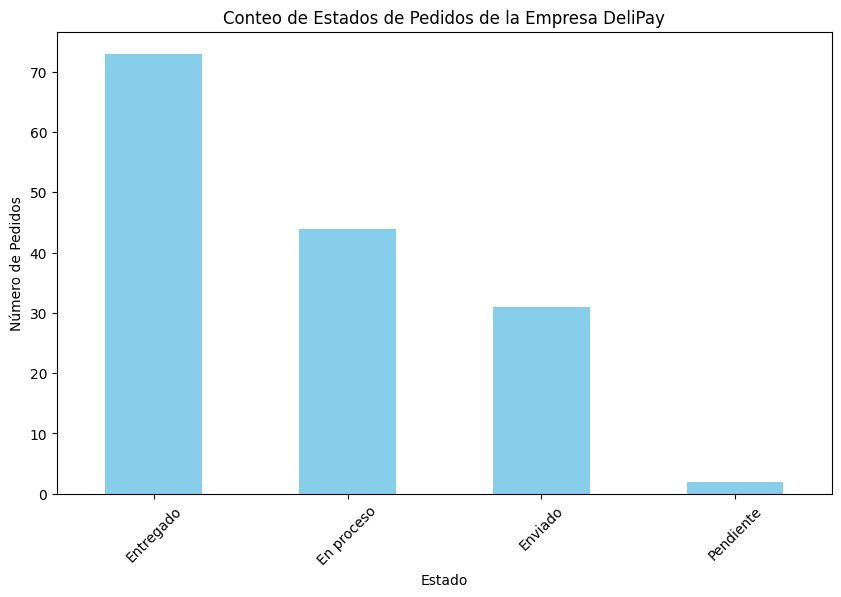

In [6]:
# Estados de los pedidos
conteo_estados = df['Estado'].value_counts()
plt.figure(figsize=(10,6))
conteo_estados.plot(kind='bar', color='skyblue')
plt.title('Conteo de Estados de Pedidos de la Empresa DeliPay')
plt.xlabel('Estado')
plt.ylabel('Número de Pedidos')
plt.xticks(rotation=45)
plt.show()

<ipython-input-7-2c76ca8a9e4a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Recomendación', palette='viridis')


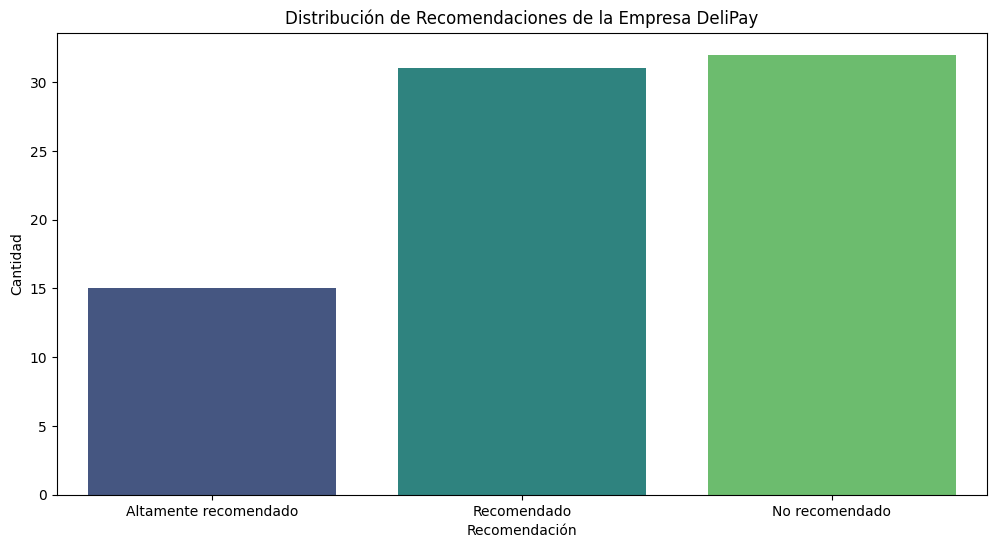

In [7]:
# Recomendaciones de los clientes
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Recomendación', palette='viridis')
plt.title('Distribución de Recomendaciones de la Empresa DeliPay')
plt.xlabel('Recomendación')
plt.ylabel('Cantidad')
plt.show()

<ipython-input-8-da87ceb3c520>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Producto', y='Cantidad', data=df, palette='Set2')


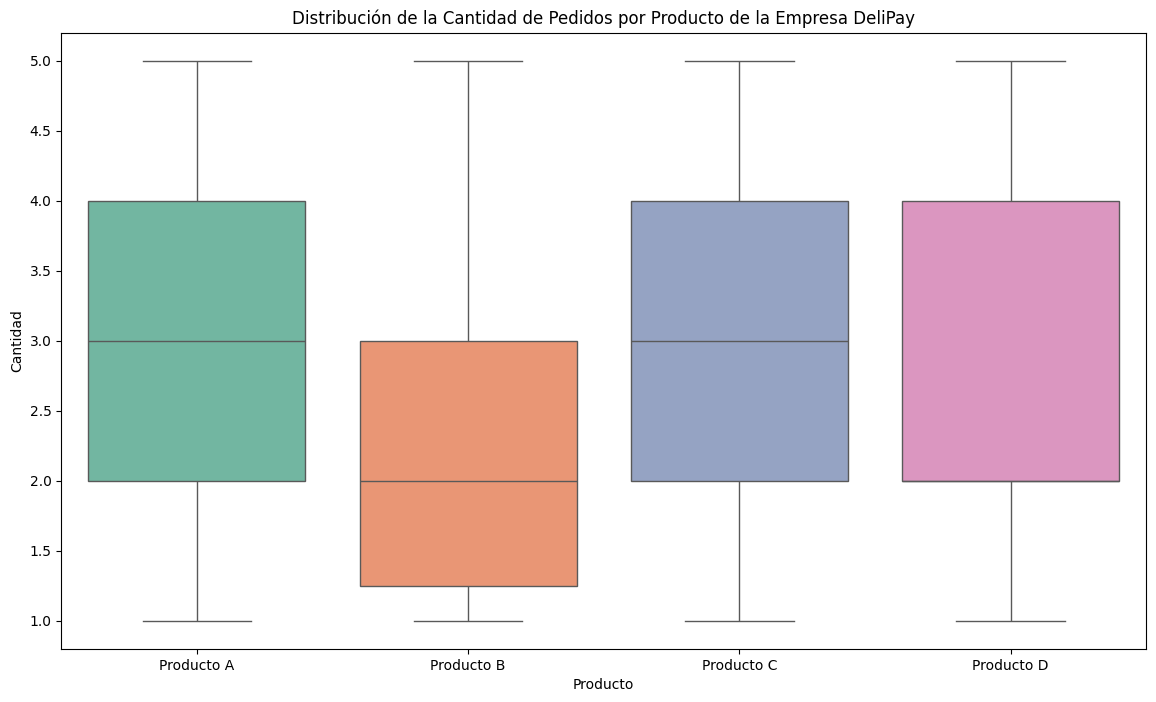

In [8]:
# Distribución de la cantidad de pedidos por producto
plt.figure(figsize=(14,8))
sns.boxplot(x='Producto', y='Cantidad', data=df, palette='Set2')
plt.title('Distribución de la Cantidad de Pedidos por Producto de la Empresa DeliPay')
plt.xlabel('Producto')
plt.ylabel('Cantidad')
plt.show()

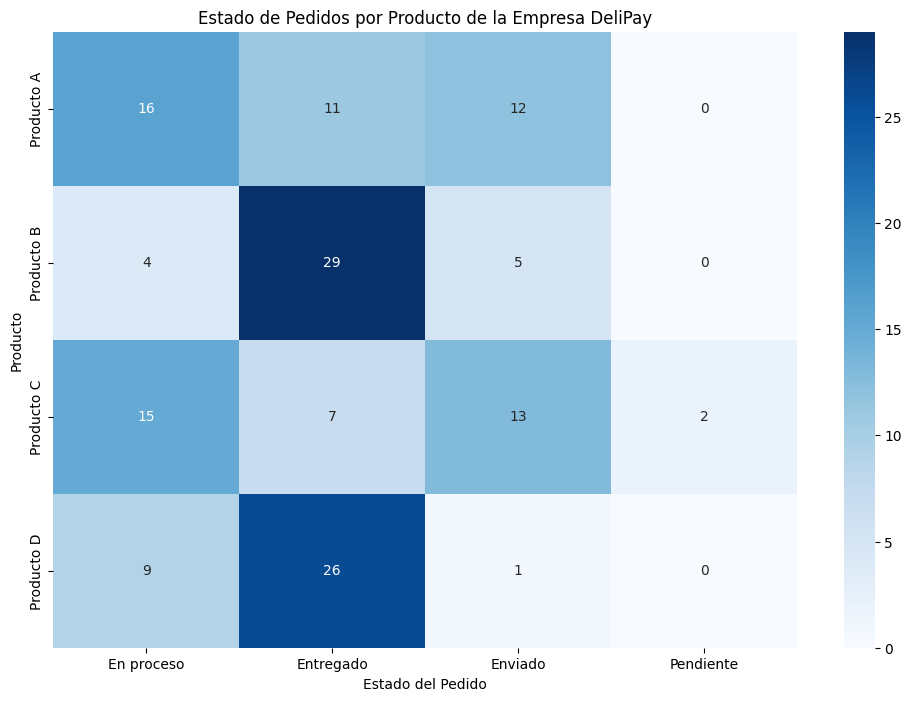

In [9]:
# Heatmap del estado de pedidos por producto
estado_producto = pd.crosstab(df['Producto'], df['Estado'])
plt.figure(figsize=(12,8))
sns.heatmap(estado_producto, annot=True, cmap='Blues', fmt='d')
plt.title('Estado de Pedidos por Producto de la Empresa DeliPay')
plt.xlabel('Estado del Pedido')
plt.ylabel('Producto')
plt.show()

<ipython-input-10-55e4c0a6e0df>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='ClasificaciónComentario', palette='coolwarm')


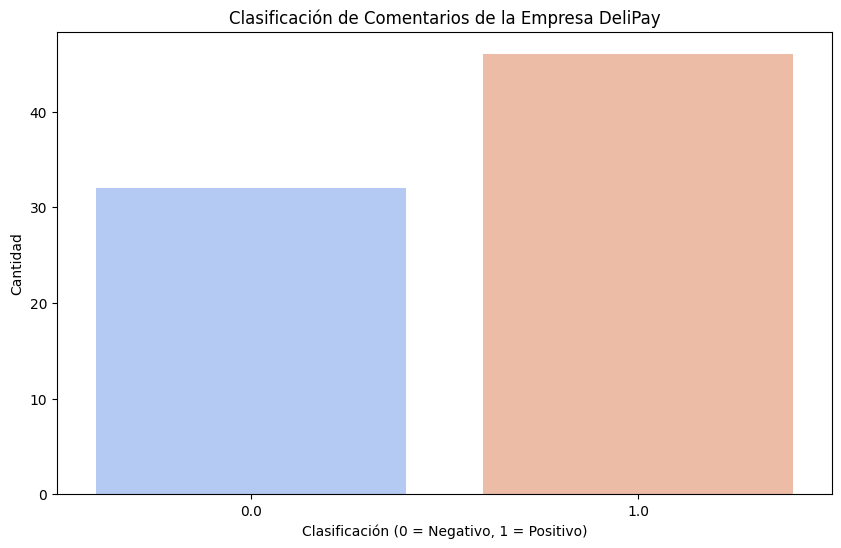

In [10]:
# Clasificación de comentarios
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='ClasificaciónComentario', palette='coolwarm')
plt.title('Clasificación de Comentarios de la Empresa DeliPay')
plt.xlabel('Clasificación (0 = Negativo, 1 = Positivo)')
plt.ylabel('Cantidad')
plt.show()


In [11]:
# Filtrar datos con comentarios para el análisis
df_comentarios = df.dropna(subset=['Comentarios'])

<ipython-input-12-c2a75ca9f490>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Producto', y='ClasificaciónComentario', data=df_comentarios, palette='Set3')


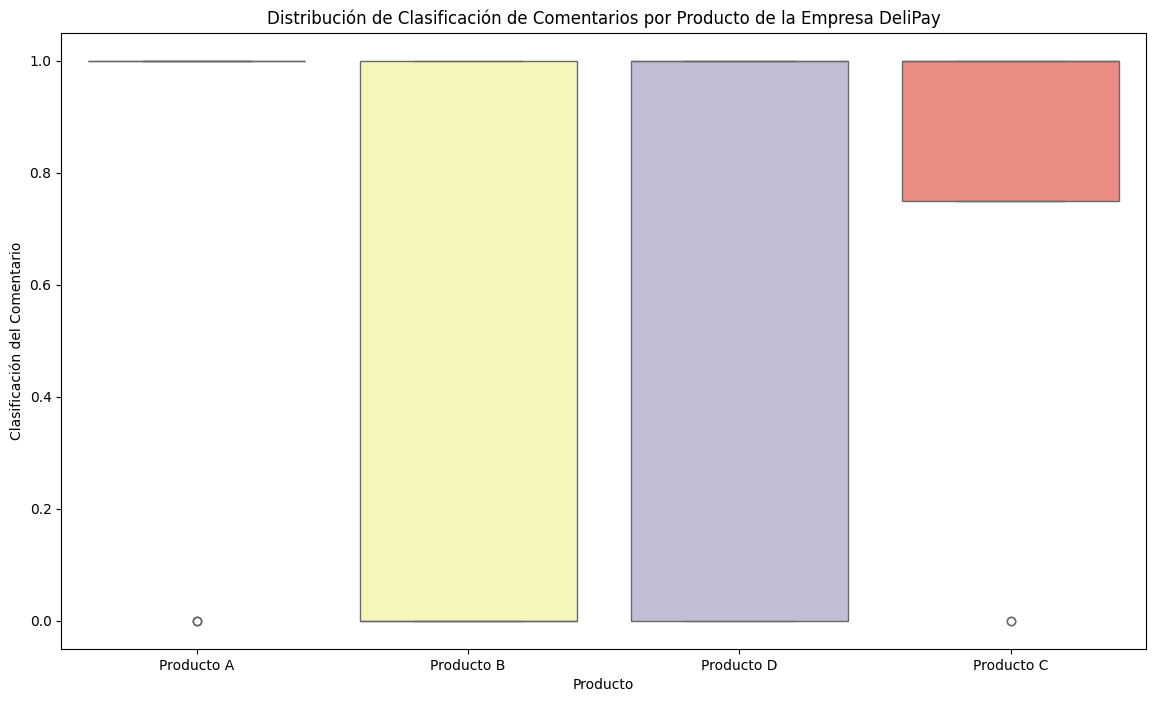

In [12]:
# Distribución de clasificación de comentarios por producto
plt.figure(figsize=(14,8))
sns.boxplot(x='Producto', y='ClasificaciónComentario', data=df_comentarios, palette='Set3')
plt.title('Distribución de Clasificación de Comentarios por Producto de la Empresa DeliPay')
plt.xlabel('Producto')
plt.ylabel('Clasificación del Comentario')
plt.show()

# 1. Análisis de tendencia por producto a lo largo del tiempo

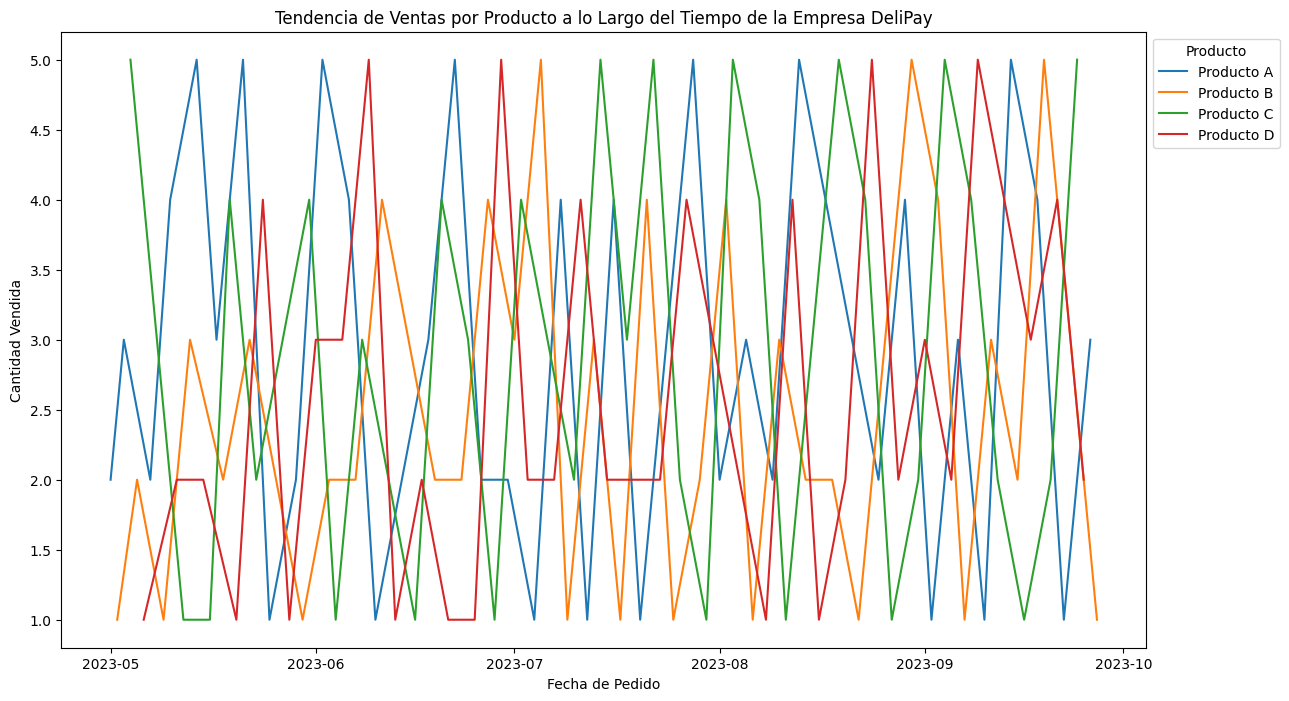

In [13]:
plt.figure(figsize=(14,8))
sns.lineplot(x='FechaPedido', y='Cantidad', hue='Producto', data=df)
plt.title('Tendencia de Ventas por Producto a lo Largo del Tiempo de la Empresa DeliPay')
plt.xlabel('Fecha de Pedido')
plt.ylabel('Cantidad Vendida')
plt.legend(title='Producto', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

# 2. Análisis de duración del ciclo de pedido

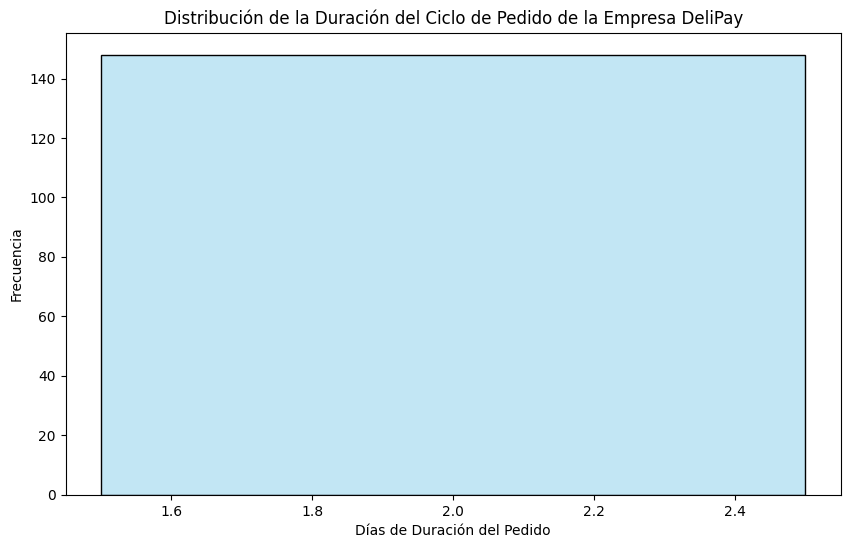

In [14]:
df['DuracionPedido'] = (df['FechaEnvio'] - df['FechaPedido']).dt.days
plt.figure(figsize=(10,6))
sns.histplot(df['DuracionPedido'].dropna(), kde=True, color='skyblue')
plt.title('Distribución de la Duración del Ciclo de Pedido de la Empresa DeliPay')
plt.xlabel('Días de Duración del Pedido')
plt.ylabel('Frecuencia')
plt.show()

# 3. Análisis de relación entre la clasificación del comentario y la recomendación

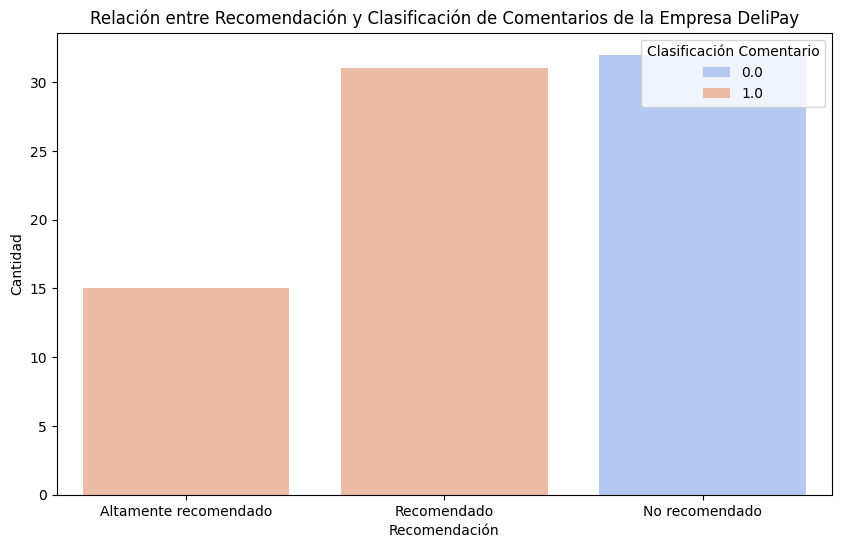

In [15]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Recomendación', hue='ClasificaciónComentario', palette='coolwarm')
plt.title('Relación entre Recomendación y Clasificación de Comentarios de la Empresa DeliPay')
plt.xlabel('Recomendación')
plt.ylabel('Cantidad')
plt.legend(title='Clasificación Comentario', loc='upper right')
plt.show()

# 4. Visualización geográfica de clientes (si hay información disponible)

In [ ]:
# Suponiendo que tenemos información sobre la ubicación de los clientes en las columnas 'Ciudad' y 'País'
plt.figure(figsize=(10,6))
sns.scatterplot(x='Ciudad', y='País', data=df, alpha=0.6)
plt.title('Distribución Geográfica de Clientes')
plt.xlabel('Ciudad')
plt.ylabel('País')
plt.xticks(rotation=45)
plt.show()

# 5. Análisis de estacionalidad

<ipython-input-16-697f8ee4a83d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='MesPedido', y='Cantidad', data=df, palette='Set2')


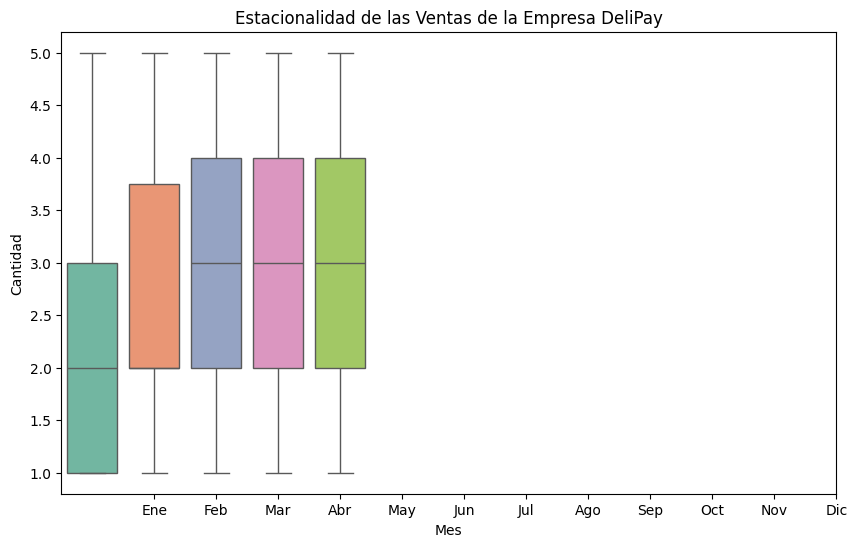

In [16]:
df['MesPedido'] = df['FechaPedido'].dt.month
plt.figure(figsize=(10,6))
sns.boxplot(x='MesPedido', y='Cantidad', data=df, palette='Set2')
plt.title('Estacionalidad de las Ventas de la Empresa DeliPay')
plt.xlabel('Mes')
plt.ylabel('Cantidad')
plt.xticks(ticks=range(1, 13), labels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.show()

# 6. Análisis de la relación entre cantidad de pedidos y estado del pedido

<ipython-input-17-da25b4c8d96f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Estado', y='Cantidad', data=df, palette='Set3')


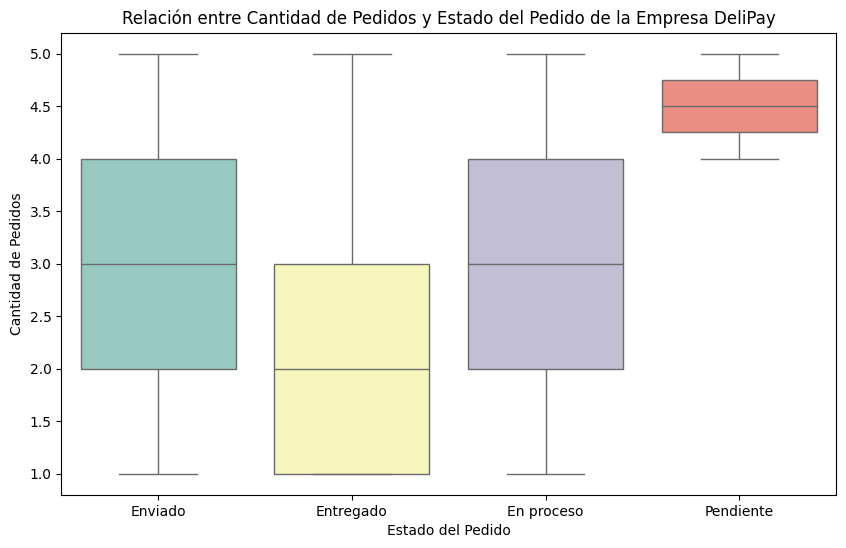

In [17]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Estado', y='Cantidad', data=df, palette='Set3')
plt.title('Relación entre Cantidad de Pedidos y Estado del Pedido de la Empresa DeliPay')
plt.xlabel('Estado del Pedido')
plt.ylabel('Cantidad de Pedidos')
plt.show()

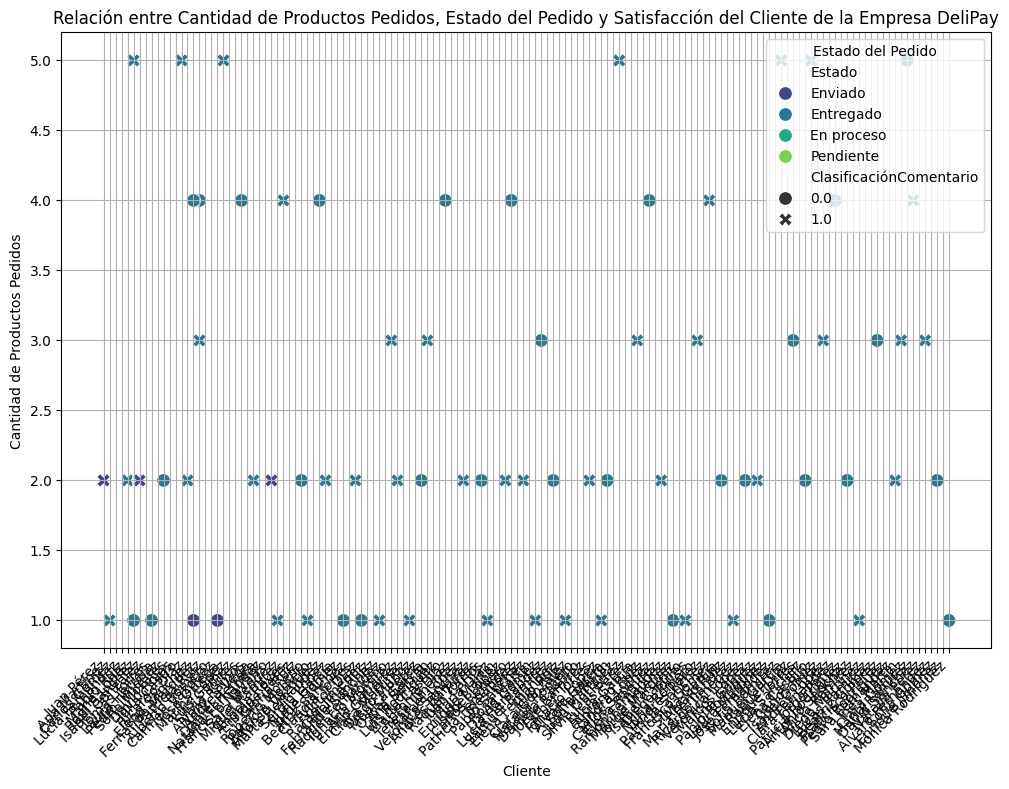

In [18]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Cliente', y='Cantidad', hue='Estado', style='ClasificaciónComentario', data=df, s=100, palette='viridis')
plt.title('Relación entre Cantidad de Productos Pedidos, Estado del Pedido y Satisfacción del Cliente de la Empresa DeliPay')
plt.xlabel('Cliente')
plt.ylabel('Cantidad de Productos Pedidos')
plt.legend(title='Estado del Pedido', loc='upper right')
plt.grid(True)
plt.xticks(rotation=45, ha='right')
plt.show()

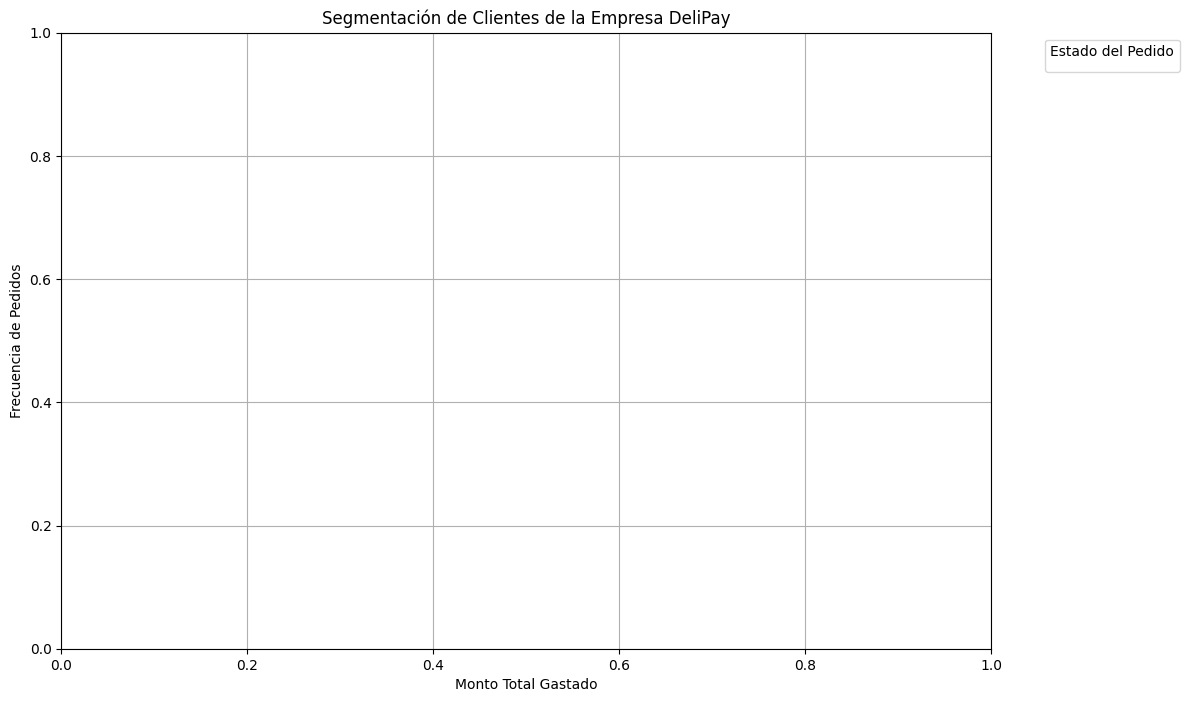

In [19]:
# Paso 1: Calcular el monto total gastado por cada cliente
monto_total_por_cliente = df.groupby('Cliente')['Cantidad'].sum()

# Paso 2: Determinar la frecuencia de pedidos para cada cliente
frecuencia_pedidos_por_cliente = df['Cliente'].value_counts()

# Paso 3: Agrupar a los clientes en segmentos
# Definimos una función para asignar segmentos basados en las características
def asignar_segmento(row):
    if row['Cantidad'] >= monto_total_por_cliente.quantile(0.75) and frecuencia_pedidos_por_cliente[row['Cliente']] >= frecuencia_pedidos_por_cliente.quantile(0.75):
        return 'Segmento Premium'
    elif row['Cantidad'] < monto_total_por_cliente.quantile(0.25) and frecuencia_pedidos_por_cliente[row['Cliente']] < frecuencia_pedidos_por_cliente.quantile(0.25):
        return 'Segmento Bajo'
    else:
        return 'Segmento Medio'

# Aplicamos la función para asignar segmentos a cada cliente
df['Segmento'] = df.apply(asignar_segmento, axis=1)

# Paso 4: Visualizar los segmentos
plt.figure(figsize=(12, 8))
sns.scatterplot(x=monto_total_por_cliente, y=frecuencia_pedidos_por_cliente, hue=df['Estado'], size=df['Cantidad'], sizes=(50, 300), palette='viridis', alpha=0.8)
plt.title('Segmentación de Clientes de la Empresa DeliPay')
plt.xlabel('Monto Total Gastado')
plt.ylabel('Frecuencia de Pedidos')
plt.legend(title='Estado del Pedido', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

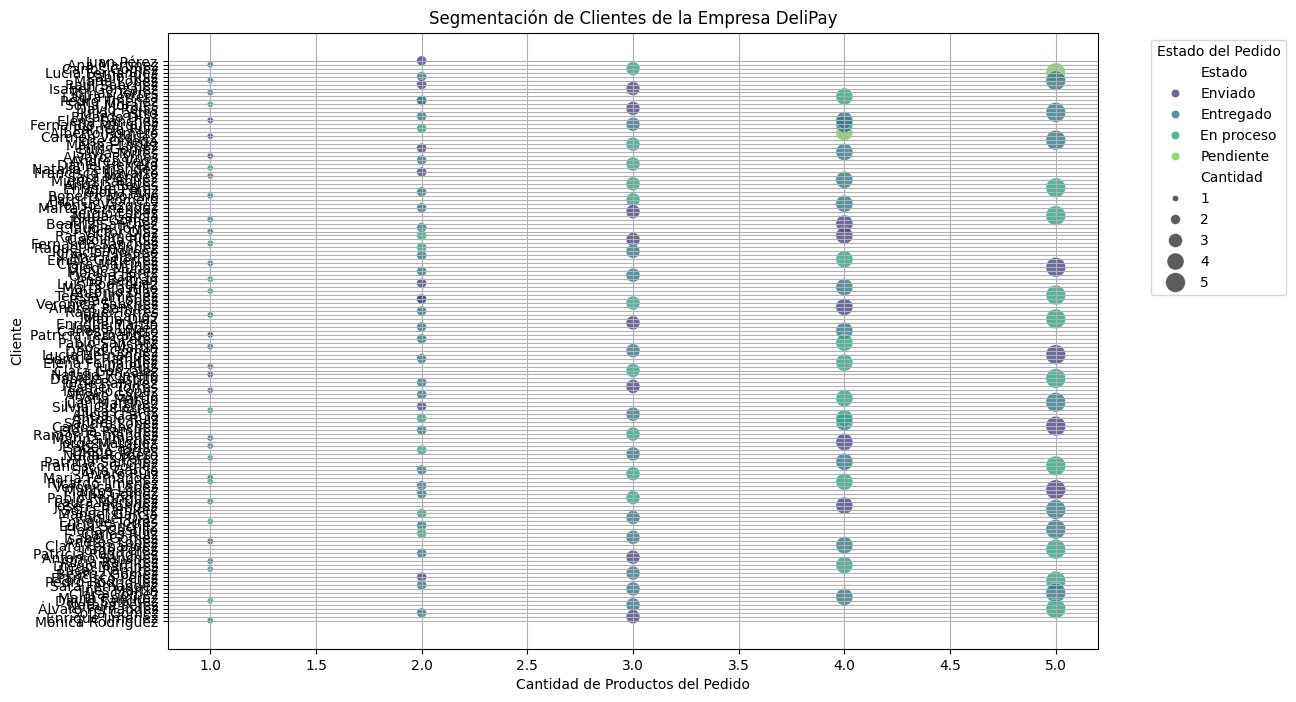

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Leer el archivo CSV
df1 = pd.read_csv('ventas_pedidos_delipay.csv', encoding='latin1')

# Paso 1: Calcular el monto total gastado por cada cliente
monto_total_por_cliente = df1.groupby('Cliente')['Cantidad'].sum()

# Paso 2: Determinar la frecuencia de pedidos para cada cliente
frecuencia_pedidos_por_cliente = df1['Cliente'].value_counts()

# Paso 3: Agrupar a los clientes en segmentos
def asignar_segmento(row):
    monto_total_cliente = monto_total_por_cliente[row['Cliente']]
    frecuencia_cliente = frecuencia_pedidos_por_cliente[row['Cliente']]

    if row['Cantidad'] >= monto_total_por_cliente.quantile(0.75) and frecuencia_cliente >= frecuencia_pedidos_por_cliente.quantile(0.75):
        return 'Segmento Premium'
    elif row['Cantidad'] < monto_total_por_cliente.quantile(0.25) and frecuencia_cliente < frecuencia_pedidos_por_cliente.quantile(0.25):
        return 'Segmento Bajo'
    else:
        return 'Segmento Medio'

# Aplicar la función para asignar segmentos a cada cliente
df1['Segmento'] = df1.apply(asignar_segmento, axis=1)

# Definir tamaños personalizados de puntos
tamanos_personalizados = [20, 50, 100, 150, 200]

# Paso 4: Visualizar los segmentos
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Cantidad', y='Cliente', hue='Estado', size='Cantidad', sizes=tamanos_personalizados, palette='viridis', alpha=0.8, data=df1)
plt.title('Segmentación de Clientes de la Empresa DeliPay')
plt.xlabel('Cantidad de Productos del Pedido')
plt.ylabel('Cliente')
plt.legend(title='Estado del Pedido', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

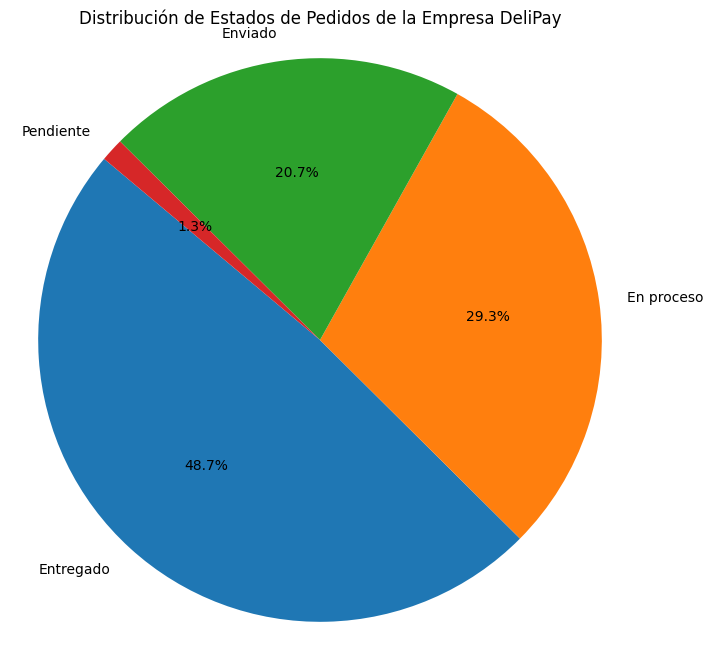

In [21]:
# Gráfico de Pastel: Distribución de Estados de Pedidos
# Contar la cantidad de cada estado de pedido
estado_pedidos = df['Estado'].value_counts()

# Crear un gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(estado_pedidos, labels=estado_pedidos.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Estados de Pedidos de la Empresa DeliPay')
plt.axis('equal')  # Asegurar que el gráfico de pastel sea circular
plt.show()

In [22]:
# data.
df.head()

,PedidoID,Cliente,Producto,Cantidad,FechaPedido,FechaEnvio,Estado,Comentarios,Recomendación,ClasificaciónComentario,DuracionPedido,MesPedido,Segmento
0,1,Juan Pérez,Producto A,2,2023-05-01,2023-05-03,Enviado,Entrega rápida,Altamente recomendado,1.0,2.0,5,Segmento Medio
1,2,Ana Martínez,Producto B,1,2023-05-02,2023-05-04,Entregado,Buen embalaje,Recomendado,1.0,2.0,5,Segmento Medio
2,3,Carlos Gómez,Producto A,3,2023-05-03,2023-05-05,En proceso,NaN,NaN,NaN,2.0,5,Segmento Medio
3,4,Lucía Fernández,Producto C,5,2023-05-04,NaT,Pendiente,NaN,NaN,NaN,NaN,5,Segmento Premium
4,5,Pablo Ruiz,Producto B,2,2023-05-05,2023-05-07,Entregado,Servicio rápido,Altamente recomendado,1.0,2.0,5,Segmento Medio


In [23]:
# filas y columnas
df.shape

(150, 13)

In [24]:
#
df.describe()

,PedidoID,Cantidad,FechaPedido,FechaEnvio,ClasificaciónComentario,DuracionPedido,MesPedido
count,150.000000,150.000000,150,148,78.000000,148.0,150.000000
mean,75.500000,2.713333,2023-07-14 12:00:00,2023-07-17 08:45:24.324324352,0.589744,2.0,6.953333
min,1.000000,1.000000,2023-05-01 00:00:00,2023-05-03 00:00:00,0.000000,2.0,5.000000
25%,38.250000,2.000000,2023-06-07 06:00:00,2023-06-10 18:00:00,0.000000,2.0,6.000000
50%,75.500000,2.500000,2023-07-14 12:00:00,2023-07-17 12:00:00,1.000000,2.0,7.000000
75%,112.750000,4.000000,2023-08-20 18:00:00,2023-08-23 06:00:00,1.000000,2.0,8.000000
max,150.000000,5.000000,2023-09-27 00:00:00,2023-09-29 00:00:00,1.000000,2.0,9.000000
std,43.445368,1.362669,NaN,NaN,0.495064,0.0,1.401517


In [25]:
# Revisar si existen campos en blanco o nulos
df.isna().any()

PedidoID                   False
Cliente                    False
Producto                   False
Cantidad                   False
FechaPedido                False
FechaEnvio                  True
Estado                     False
Comentarios                 True
Recomendación               True
ClasificaciónComentario     True
DuracionPedido              True
MesPedido                  False
Segmento                   False
dtype: bool

In [26]:
# Realiza un conteo de valores no nulos para cada columna.
df.count()

PedidoID                   150
Cliente                    150
Producto                   150
Cantidad                   150
FechaPedido                150
FechaEnvio                 148
Estado                     150
Comentarios                 78
Recomendación               78
ClasificaciónComentario     78
DuracionPedido             148
MesPedido                  150
Segmento                   150
dtype: int64

In [27]:
#data.isnull().sum()
# Retorna los valores nulos de cada columna.
df.isnull().sum()

PedidoID                    0
Cliente                     0
Producto                    0
Cantidad                    0
FechaPedido                 0
FechaEnvio                  2
Estado                      0
Comentarios                72
Recomendación              72
ClasificaciónComentario    72
DuracionPedido              2
MesPedido                   0
Segmento                    0
dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   PedidoID                 150 non-null    int64         
 1   Cliente                  150 non-null    object        
 2   Producto                 150 non-null    object        
 3   Cantidad                 150 non-null    int64         
 4   FechaPedido              150 non-null    datetime64[ns]
 5   FechaEnvio               148 non-null    datetime64[ns]
 6   Estado                   150 non-null    object        
 7   Comentarios              78 non-null     object        
 8   Recomendación            78 non-null     object        
 9   ClasificaciónComentario  78 non-null     float64       
 10  DuracionPedido           148 non-null    float64       
 11  MesPedido                150 non-null    int32         
 12  Segmento                 150 non-nul

In [29]:
df.tail()

,PedidoID,Cliente,Producto,Cantidad,FechaPedido,FechaEnvio,Estado,Comentarios,Recomendación,ClasificaciónComentario,DuracionPedido,MesPedido,Segmento
145,146,Natalia Pérez,Producto B,3,2023-09-23,2023-09-25,Entregado,Entrega rápida,Recomendado,1.0,2.0,9,Segmento Medio
146,147,Álvaro Fernández,Producto C,5,2023-09-24,2023-09-26,En proceso,NaN,NaN,NaN,2.0,9,Segmento Premium
147,148,Sofía Gómez,Producto D,2,2023-09-25,2023-09-27,Entregado,Mal embalaje,No recomendado,0.0,2.0,9,Segmento Medio
148,149,Enrique Jiménez,Producto A,3,2023-09-26,2023-09-28,Enviado,NaN,NaN,NaN,2.0,9,Segmento Medio
149,150,Mónica Rodríguez,Producto B,1,2023-09-27,2023-09-29,Entregado,Entrega tardía,No recomendado,0.0,2.0,9,Segmento Medio


In [30]:
df.head(15)  ## DATAHEAD DE LA DATA ORIGINAL. mostrará las primeras 15 filas de esa serie.

,PedidoID,Cliente,Producto,Cantidad,FechaPedido,FechaEnvio,Estado,Comentarios,Recomendación,ClasificaciónComentario,DuracionPedido,MesPedido,Segmento
0,1,Juan Pérez,Producto A,2,2023-05-01,2023-05-03,Enviado,Entrega rápida,Altamente recomendado,1.0,2.0,5,Segmento Medio
1,2,Ana Martínez,Producto B,1,2023-05-02,2023-05-04,Entregado,Buen embalaje,Recomendado,1.0,2.0,5,Segmento Medio
2,3,Carlos Gómez,Producto A,3,2023-05-03,2023-05-05,En proceso,NaN,NaN,NaN,2.0,5,Segmento Medio
3,4,Lucía Fernández,Producto C,5,2023-05-04,NaT,Pendiente,NaN,NaN,NaN,NaN,5,Segmento Premium
4,5,Pablo Ruiz,Producto B,2,2023-05-05,2023-05-07,Entregado,Servicio rápido,Altamente recomendado,1.0,2.0,5,Segmento Medio
5,6,María López,Producto D,1,2023-05-06,2023-05-08,Entregado,Producto defectuoso,No recomendado,0.0,2.0,5,Segmento Medio
6,7,Raúl Sánchez,Producto A,2,2023-05-07,2023-05-09,Enviado,Entrega a tiempo,Recomendado,1.0,2.0,5,Segmento Medio
7,8,Isabel González,Producto C,3,2023-05-08,2023-05-10,Enviado,NaN,NaN,NaN,2.0,5,Segmento Medio
8,9,Tomás Torres,Producto B,1,2023-05-09,2023-05-11,Entregado,Mal embalaje,No recomendado,0.0,2.0,5,Segmento Medio
9,10,Laura Herrera,Producto A,4,2023-05-10,2023-05-12,En proceso,NaN,NaN,NaN,2.0,5,Segmento Premium


In [31]:
df.tail(15)  ## DATATAIL DE LA DATA ORIGINAL.  mostrará las últimas 15 filas de esa serie.

,PedidoID,Cliente,Producto,Cantidad,FechaPedido,FechaEnvio,Estado,Comentarios,Recomendación,ClasificaciónComentario,DuracionPedido,MesPedido,Segmento
135,136,Elena Sánchez,Producto D,4,2023-09-13,2023-09-15,Entregado,Mal embalaje,No recomendado,0.0,2.0,9,Segmento Premium
136,137,Pedro Rodríguez,Producto A,5,2023-09-14,2023-09-16,En proceso,NaN,NaN,NaN,2.0,9,Segmento Premium
137,138,Sara Fernández,Producto B,2,2023-09-15,2023-09-17,Entregado,Buen producto,Recomendado,1.0,2.0,9,Segmento Medio
138,139,Ricardo Jiménez,Producto C,1,2023-09-16,2023-09-18,En proceso,NaN,NaN,NaN,2.0,9,Segmento Medio
139,140,Inés Martín,Producto D,3,2023-09-17,2023-09-19,Entregado,Entrega puntual,Recomendado,1.0,2.0,9,Segmento Medio
140,141,Antonio Ruiz,Producto A,4,2023-09-18,2023-09-20,En proceso,NaN,NaN,NaN,2.0,9,Segmento Premium
141,142,Clara Gómez,Producto B,5,2023-09-19,2023-09-21,Entregado,Producto defectuoso,No recomendado,0.0,2.0,9,Segmento Premium
142,143,Rafael López,Producto C,2,2023-09-20,2023-09-22,Enviado,NaN,NaN,NaN,2.0,9,Segmento Medio
143,144,María Ramírez,Producto D,4,2023-09-21,2023-09-23,Entregado,Excelente servicio,Altamente recomendado,1.0,2.0,9,Segmento Premium
144,145,David Sánchez,Producto A,1,2023-09-22,2023-09-24,En proceso,NaN,NaN,NaN,2.0,9,Segmento Medio


In [40]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster
from IPython.display import display, HTML
from folium import IFrame

# Datos de ejemplo con coordenadas geográficas (latitud y longitud)
data = {
    'PedidoID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28,
                 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50],
    'Cliente': ['Juan Pérez', 'Ana Martínez', 'Carlos Gómez', 'Lucía Fernández', 'Pablo Ruiz', 'María López',
                'Raúl Sánchez', 'Isabel González', 'Tomás Torres', 'Laura Herrera', 'Pedro Jiménez', 'Sofía Morales',
                'David Rojas', 'Julia Castro', 'Ricardo Díaz', 'Elena Sánchez', 'Fernando Márquez', 'Patricia Ruiz',
                'Alberto Romero', 'Carmen Vázquez', 'José Ortega', 'Marina López', 'Luis Gómez', 'Silvia Torres',
                'Álvaro Ramos', 'Andrea Vega', 'Daniel Herrera', 'Natalia Fernández', 'Francisco Navarro', 'Sara Méndez',
                'Miguel Ramírez', 'Ángela Reyes', 'Enrique Pérez', 'Gloria Ruiz', 'Roberto Moreno', 'Patricia Romero',
                'Alfonso Vázquez', 'Marta Hernández', 'Sergio López', 'Nuria García', 'Jorge Gómez', 'Beatriz Sánchez',
                'Claudia Torres', 'Víctor Díaz', 'Rafael Jiménez', 'Carolina Ruiz', 'Fernando Sánchez', 'Raquel Fernández',
                'Ignacio Moreno', 'Ana Ramírez'],
    'Producto': ['Producto A', 'Producto B', 'Producto A', 'Producto C', 'Producto B', 'Producto D',
                 'Producto A', 'Producto C', 'Producto B', 'Producto A', 'Producto D', 'Producto C',
                 'Producto B', 'Producto A', 'Producto D', 'Producto C', 'Producto A', 'Producto B',
                 'Producto C', 'Producto D', 'Producto A', 'Producto B', 'Producto C', 'Producto D',
                 'Producto A', 'Producto B', 'Producto C', 'Producto D', 'Producto A', 'Producto B',
                 'Producto C', 'Producto D', 'Producto A', 'Producto B', 'Producto C', 'Producto D',
                 'Producto A', 'Producto B', 'Producto C', 'Producto D', 'Producto A', 'Producto B',
                 'Producto C', 'Producto D', 'Producto A', 'Producto B', 'Producto C', 'Producto D',
                 'Producto A', 'Producto B'],
    'Cantidad': [2, 1, 3, 5, 2, 1, 2, 3, 1, 4, 2, 1, 3, 5, 2, 1, 3, 2, 4, 1, 5, 3, 2, 4, 1, 2, 3, 1,
                 2, 1, 4, 3, 5, 2, 1, 3, 4, 2, 3, 5, 1, 4, 2, 1, 2, 3, 1, 2, 3, 2],
    'FechaPedido': ['2023-05-01', '2023-05-02', '2023-05-03', '2023-05-04', '2023-05-05', '2023-05-06',
                    '2023-05-07', '2023-05-08', '2023-05-09', '2023-05-10', '2023-05-11', '2023-05-12',
                    '2023-05-13', '2023-05-14', '2023-05-15', '2023-05-16', '2023-05-17', '2023-05-18',
                    '2023-05-19', '2023-05-20', '2023-05-21', '2023-05-22', '2023-05-23', '2023-05-24',
                    '2023-05-25', '2023-05-26', '2023-05-27', '2023-05-28', '2023-05-29', '2023-05-30',
                    '2023-05-31', '2023-06-01', '2023-06-02', '2023-06-03', '2023-06-04', '2023-06-05',
                    '2023-06-06', '2023-06-07', '2023-06-08', '2023-06-09', '2023-06-10', '2023-06-11',
                    '2023-06-12', '2023-06-13', '2023-06-14', '2023-06-15', '2023-06-16', '2023-06-17',
                    '2023-06-18', '2023-06-19'],
    'FechaEnvio': ['2023-05-03', '2023-05-04', '2023-05-05', '', '2023-05-07', '2023-05-08',
                   '2023-05-09', '2023-05-10', '2023-05-11', '', '2023-05-13', '',
                   '2023-05-15', '2023-05-16', '2023-05-17', '2023-05-18', '2023-05-19', '',
                   '', '2023-05-22', '2023-05-23', '', '2023-05-25', '2023-05-26',
                   '2023-05-27', '2023-05-28', '', '', '2023-05-31', '2023-06-01',
                   '2023-06-02', '', '', '2023-06-05', '2023-06-06', '',
                   '2023-06-08', '2023-06-09', '2023-06-10', '', '2023-06-12', '',
                   '2023-06-14', '2023-06-15', '', '', '2023-06-18', '',
                   '2023-06-20', '2023-06-21'],
    'Estado': ['Enviado', 'Entregado', 'En proceso', 'Pendiente', 'Entregado', 'Entregado',
               'Enviado', 'Enviado', 'Entregado', 'En proceso', 'Entregado', 'En proceso',
               'Enviado', 'Entregado', 'Entregado', 'Enviado', 'Entregado', 'En proceso',
               'Pendiente', 'Enviado', 'Entregado', 'En proceso', 'Enviado', 'Entregado',
               'Enviado', 'Entregado', 'En proceso', 'En proceso', 'Enviado', 'Entregado',
               'Entregado', 'En proceso', 'En proceso', 'Entregado', 'Entregado', 'En proceso',
               'Entregado', 'Entregado', 'Enviado', 'En proceso', 'Entregado', 'Enviado',
               'Entregado', 'Entregado', 'En proceso', 'Enviado', 'Entregado', 'En proceso',
               'Entregado', 'Entregado'],
    'Latitud': [-12.0464, -12.0453, -12.0476, -12.0458, -12.0465, -12.0462,
                -12.0454, -12.0469, -12.0471, -12.0457, -12.0463, -12.0460,
                -12.0455, -12.0466, -12.0461, -12.0459, -12.0470, -12.0467,
                -12.0468, -12.0456, -12.0472, -12.0464, -12.0453, -12.0476,
                -12.0458, -12.0465, -12.0462, -12.0454, -12.0466, -12.0455,
                -12.0467, -12.0456, -12.0459, -12.0468, -12.0461, -12.0472,
                -12.0453, -12.0463, -12.0462, -12.0465, -12.0454, -12.0466,
                -12.0470, -12.0468, -12.0457, -12.0467, -12.0464, -12.0469,
                -12.0455, -12.0460],
    'Longitud': [-77.0428, -77.0435, -77.0427, -77.0432, -77.0434, -77.0426,
                 -77.0431, -77.0429, -77.0433, -77.0425, -77.0430, -77.0428,
                 -77.0435, -77.0427, -77.0432, -77.0434, -77.0426, -77.0431,
                 -77.0429, -77.0433, -77.0425, -77.0430, -77.0428, -77.0435,
                 -77.0427, -77.0432, -77.0434, -77.0426, -77.0427, -77.0433,
                 -77.0434, -77.0425, -77.0431, -77.0430, -77.0429, -77.0425,
                 -77.0431, -77.0428, -77.0433, -77.0434, -77.0431, -77.0427,
                 -77.0430, -77.0429, -77.0428, -77.0433, -77.0434, -77.0431,
                 -77.0430, -77.0425]
}

# Crear el DataFrame
df = pd.DataFrame(data)

# Crear un mapa centrado en Lima, Perú
m = folium.Map(location=[-12.0464, -77.0428], zoom_start=13)

# Crear un MarkerCluster para agrupar los marcadores
marker_cluster = MarkerCluster().add_to(m)

# Agregar marcadores al mapa
for index, row in df.iterrows():
    folium.Marker(
        location=[row['Latitud'], row['Longitud']],
        popup=f"PedidoID: {row['PedidoID']}<br>Cliente: {row['Cliente']}<br>Estado: {row['Estado']}",
        icon=folium.Icon(color='green' if row['Estado'] == 'Entregado' else 'red' if row['Estado'] == 'Pendiente' else 'blue')
    ).add_to(marker_cluster)

# Agregar un título en la parte superior del mapa
title_html = '''
             <h3 align="center" style="font-size:30px"><b>Mapa de Estado de Pedidos de la Empresa DeliPay</b></h3>
             <p align="center" style="font-size:24px">Este mapa muestra la ubicación y el estado de los pedidos realizados en mayo de 2023.</p>
             '''
m.get_root().html.add_child(folium.Element(title_html))

# Agregar una descripción en la parte inferior del mapa
description_html = '''
                   <div style="position: fixed;
                               bottom: 10px; left: 10px; width: 100%;
                               border:2px solid grey; z-index:9999; font-size:14px;">
                   <p align="center" style="font-size:24px"><b>Descripción:</b> Este mapa muestra la ubicación y el estado de los pedidos realizados en mayo de 2023.</p>
                   </div>
                   '''
m.get_root().html.add_child(folium.Element(description_html))

# Mostrar el mapa en el notebook
m

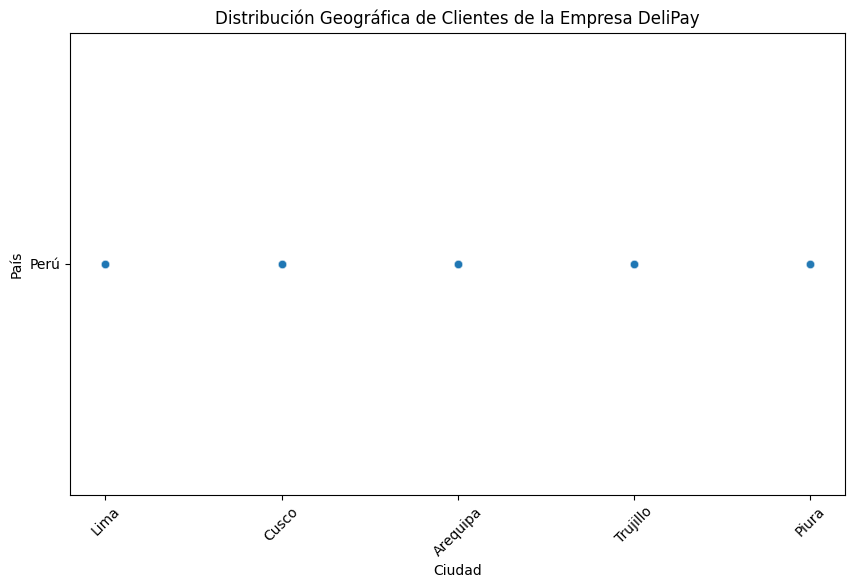

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Datos de ejemplo con información de Ciudad y País
data = {
    'PedidoID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28,
                 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50],
    'Cliente': ['Juan Pérez', 'Ana Martínez', 'Carlos Gómez', 'Lucía Fernández', 'Pablo Ruiz', 'María López',
                'Raúl Sánchez', 'Isabel González', 'Tomás Torres', 'Laura Herrera', 'Pedro Jiménez', 'Sofía Morales',
                'David Rojas', 'Julia Castro', 'Ricardo Díaz', 'Elena Sánchez', 'Fernando Márquez', 'Patricia Ruiz',
                'Alberto Romero', 'Carmen Vázquez', 'José Ortega', 'Marina López', 'Luis Gómez', 'Silvia Torres',
                'Álvaro Ramos', 'Andrea Vega', 'Daniel Herrera', 'Natalia Fernández', 'Francisco Navarro', 'Sara Méndez',
                'Miguel Ramírez', 'Ángela Reyes', 'Enrique Pérez', 'Gloria Ruiz', 'Roberto Moreno', 'Patricia Romero',
                'Alfonso Vázquez', 'Marta Hernández', 'Sergio López', 'Nuria García', 'Jorge Gómez', 'Beatriz Sánchez',
                'Claudia Torres', 'Víctor Díaz', 'Rafael Jiménez', 'Carolina Ruiz', 'Fernando Sánchez', 'Raquel Fernández',
                'Ignacio Moreno', 'Ana Ramírez'],
    'Producto': ['Producto A', 'Producto B', 'Producto A', 'Producto C', 'Producto B', 'Producto D',
                 'Producto A', 'Producto C', 'Producto B', 'Producto A', 'Producto D', 'Producto C',
                 'Producto B', 'Producto A', 'Producto D', 'Producto C', 'Producto A', 'Producto B',
                 'Producto C', 'Producto D', 'Producto A', 'Producto B', 'Producto C', 'Producto D',
                 'Producto A', 'Producto B', 'Producto C', 'Producto D', 'Producto A', 'Producto B',
                 'Producto C', 'Producto D', 'Producto A', 'Producto B', 'Producto C', 'Producto D',
                 'Producto A', 'Producto B', 'Producto C', 'Producto D', 'Producto A', 'Producto B',
                 'Producto C', 'Producto D', 'Producto A', 'Producto B', 'Producto C', 'Producto D',
                 'Producto A', 'Producto B'],
    'Cantidad': [2, 1, 3, 5, 2, 1, 2, 3, 1, 4, 2, 1, 3, 5, 2, 1, 3, 2, 4, 1, 5, 3, 2, 4, 1, 2, 3, 1,
                 2, 1, 4, 3, 5, 2, 1, 3, 4, 2, 3, 5, 1, 4, 2, 1, 2, 3, 1, 2, 3, 2],
    'FechaPedido': ['2023-05-01', '2023-05-02', '2023-05-03', '2023-05-04', '2023-05-05', '2023-05-06',
                    '2023-05-07', '2023-05-08', '2023-05-09', '2023-05-10', '2023-05-11', '2023-05-12',
                    '2023-05-13', '2023-05-14', '2023-05-15', '2023-05-16', '2023-05-17', '2023-05-18',
                    '2023-05-19', '2023-05-20', '2023-05-21', '2023-05-22', '2023-05-23', '2023-05-24',
                    '2023-05-25', '2023-05-26', '2023-05-27', '2023-05-28', '2023-05-29', '2023-05-30',
                    '2023-05-31', '2023-06-01', '2023-06-02', '2023-06-03', '2023-06-04', '2023-06-05',
                    '2023-06-06', '2023-06-07', '2023-06-08', '2023-06-09', '2023-06-10', '2023-06-11',
                    '2023-06-12', '2023-06-13', '2023-06-14', '2023-06-15', '2023-06-16', '2023-06-17',
                    '2023-06-18', '2023-06-19'],
    'FechaEnvio': ['2023-05-03', '2023-05-04', '2023-05-05', '', '2023-05-07', '2023-05-08',
                   '2023-05-09', '2023-05-10', '2023-05-11', '', '2023-05-13', '',
                   '2023-05-15', '2023-05-16', '2023-05-17', '2023-05-18', '2023-05-19', '',
                   '', '2023-05-22', '2023-05-23', '', '2023-05-25', '2023-05-26',
                   '2023-05-27', '2023-05-28', '', '', '2023-05-31', '2023-06-01',
                   '2023-06-02', '', '', '2023-06-05', '2023-06-06', '',
                   '2023-06-08', '2023-06-09', '2023-06-10', '', '2023-06-12', '',
                   '2023-06-14', '2023-06-15', '', '', '2023-06-18', '',
                   '2023-06-20', '2023-06-21'],
    'Estado': ['Enviado', 'Entregado', 'En proceso', 'Pendiente', 'Entregado', 'Entregado',
               'Enviado', 'Enviado', 'Entregado', 'En proceso', 'Entregado', 'En proceso',
               'Enviado', 'Entregado', 'Entregado', 'Enviado', 'Entregado', 'En proceso',
               'Pendiente', 'Enviado', 'Entregado', 'En proceso', 'Enviado', 'Entregado',
               'Enviado', 'Entregado', 'En proceso', 'En proceso', 'Enviado', 'Entregado',
               'Entregado', 'En proceso', 'En proceso', 'Entregado', 'Entregado', 'En proceso',
               'Entregado', 'Entregado', 'Enviado', 'En proceso', 'Entregado', 'Enviado',
               'Entregado', 'Entregado', 'En proceso', 'Enviado', 'Entregado', 'En proceso',
               'Entregado', 'Entregado'],
    'Ciudad': ['Lima', 'Lima', 'Cusco', 'Cusco', 'Arequipa', 'Arequipa',
               'Lima', 'Trujillo', 'Trujillo', 'Piura', 'Piura', 'Lima',
               'Cusco', 'Arequipa', 'Arequipa', 'Lima', 'Trujillo', 'Trujillo',
               'Piura', 'Piura', 'Lima', 'Lima', 'Cusco', 'Cusco',
               'Arequipa', 'Arequipa', 'Lima', 'Trujillo', 'Lima', 'Trujillo',
               'Cusco', 'Cusco', 'Arequipa', 'Arequipa', 'Lima', 'Trujillo',
               'Lima', 'Lima', 'Cusco', 'Cusco', 'Arequipa', 'Arequipa',
               'Lima', 'Trujillo', 'Lima', 'Trujillo', 'Lima', 'Lima',
               'Cusco', 'Cusco'],
    'País': ['Perú'] * 50
}

# Crear el DataFrame
df = pd.DataFrame(data)

# Crear el gráfico de dispersión
plt.figure(figsize=(10,6))
sns.scatterplot(x='Ciudad', y='País', data=df, alpha=0.6)
plt.title('Distribución Geográfica de Clientes de la Empresa DeliPay')
plt.xlabel('Ciudad')
plt.ylabel('País')
plt.xticks(rotation=45)
plt.show()